In [5]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import keras

In [6]:
# load dataset
import scipy.io 
dataset = scipy.io.loadmat('dataset.mat')

In [7]:
# get training and testing sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

In [8]:
# print package version 
print('numpy:', np.__version__)
print('scipy:', sp.__version__)
print('matplotlib:', matplotlib.__version__)
print('iPython:', IPython.__version__)
print('scikit-learn:', sklearn.__version__)
print('keras: ', keras.__version__)
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

numpy: 1.15.4
scipy: 1.2.1
matplotlib: 3.0.3
iPython: 7.4.0
scikit-learn: 0.20.3
keras:  2.2.4
Tensorflow:  1.13.1


In [9]:
# import keras packages
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K

In [10]:
# batch size for gradient descent
batch_size = 32
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200 # try a larger number of epochs here (for example 10 or larger)
# input image dimensions
nmb_samples, img_rows, img_cols = x_train.shape[0], x_train.shape[1], x_train.shape[2]
nmb_test_samples = x_test.shape[0]

In [11]:
# adjust training image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

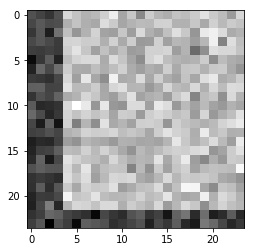

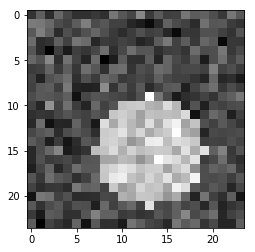

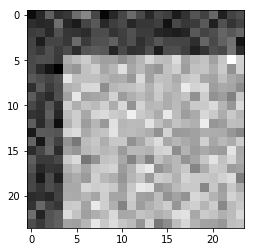

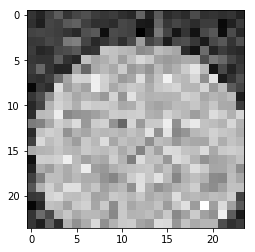

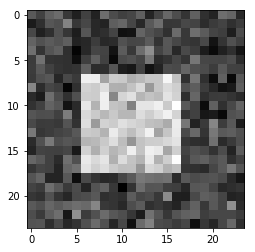

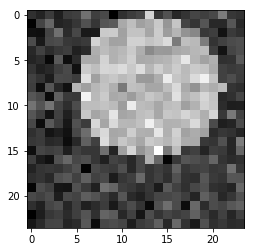

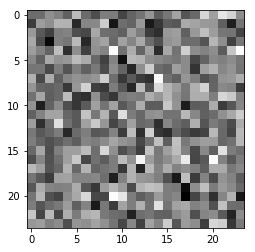

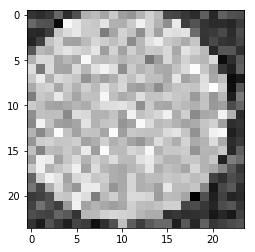

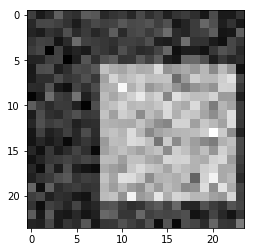

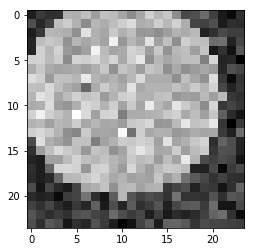

In [12]:
# display some training images
for i in range(10):
    first_image = x_train[i,:,:]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [13]:
# type casting and dimensionality transformations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(nmb_samples, img_rows*img_cols)
x_test = x_test.reshape(nmb_test_samples, img_rows*img_cols)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (200, 576)
200 train samples
100 test samples


In [14]:
# convert class vectors to binary class matrices (one hot vectors)
y_train = keras.utils.to_categorical(np.squeeze(y_train), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(y_test), num_classes)

In [15]:
# define MLP model (2 hidden layers with 512 nodes, activated by ReLUs)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
# training
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 200 samples, validate on 100 samples
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 1.0914 - acc: 0.5100 - val_loss: 0.6810 - val_acc: 0.5900
Epoch 2/200
200/200 [==============================] - 0s 577us/step - loss: 0.6926 - acc: 0.5700 - val_loss: 0.7567 - val_acc: 0.5000
Epoch 3/200
200/200 [==============================] - 0s 757us/step - loss: 0.6687 - acc: 0.6100 - val_loss: 0.7141 - val_acc: 0.5000
Epoch 4/200
200/200 [==============================] - 0s 837us/step - loss: 0.6660 - acc: 0.5950 - val_loss: 1.2013 - val_acc: 0.5000
Epoch 5/200
200/200 [==============================] - 0s 578us/step - loss: 0.7573 - acc: 0.5900 - val_loss: 0.6540 - val_acc: 0.5500
Epoch 6/200
200/200 [==============================] - 0s 636us/step - loss: 0.6523 - acc: 0.5850 - val_loss: 0.6680 - val_acc: 0.5100
Epoch 7/200
200/200 [==============================] - 0s 562us/step - loss: 0.6913 - acc: 0.6050 

200/200 [==============================] - 0s 584us/step - loss: 0.0206 - acc: 1.0000 - val_loss: 0.2810 - val_acc: 0.8900
Epoch 60/200
200/200 [==============================] - 0s 532us/step - loss: 0.0148 - acc: 1.0000 - val_loss: 0.3804 - val_acc: 0.8600
Epoch 61/200
200/200 [==============================] - 0s 747us/step - loss: 0.0162 - acc: 1.0000 - val_loss: 0.3730 - val_acc: 0.8300
Epoch 62/200
200/200 [==============================] - 0s 497us/step - loss: 0.4896 - acc: 0.8050 - val_loss: 0.3090 - val_acc: 0.8800
Epoch 63/200
200/200 [==============================] - 0s 674us/step - loss: 0.0450 - acc: 1.0000 - val_loss: 0.3137 - val_acc: 0.8800
Epoch 64/200
200/200 [==============================] - 0s 676us/step - loss: 0.0269 - acc: 1.0000 - val_loss: 0.2923 - val_acc: 0.8800
Epoch 65/200
200/200 [==============================] - 0s 536us/step - loss: 0.0194 - acc: 1.0000 - val_loss: 0.3170 - val_acc: 0.8700
Epoch 66/200
200/200 [==============================] - 0s 55

200/200 [==============================] - 0s 528us/step - loss: 6.7457e-04 - acc: 1.0000 - val_loss: 0.3761 - val_acc: 0.8700
Epoch 120/200
200/200 [==============================] - 0s 828us/step - loss: 6.1191e-04 - acc: 1.0000 - val_loss: 0.3832 - val_acc: 0.8700
Epoch 121/200
200/200 [==============================] - 0s 650us/step - loss: 5.7143e-04 - acc: 1.0000 - val_loss: 0.3630 - val_acc: 0.8800
Epoch 122/200
200/200 [==============================] - 0s 913us/step - loss: 5.0854e-04 - acc: 1.0000 - val_loss: 0.3437 - val_acc: 0.8800
Epoch 123/200
200/200 [==============================] - 0s 711us/step - loss: 5.3459e-04 - acc: 1.0000 - val_loss: 0.3682 - val_acc: 0.8700
Epoch 124/200
200/200 [==============================] - 0s 744us/step - loss: 5.4783e-04 - acc: 1.0000 - val_loss: 0.3640 - val_acc: 0.8900
Epoch 125/200
200/200 [==============================] - 0s 665us/step - loss: 4.3464e-04 - acc: 1.0000 - val_loss: 0.4248 - val_acc: 0.8800
Epoch 126/200
200/200 [====

200/200 [==============================] - 0s 799us/step - loss: 7.4143e-05 - acc: 1.0000 - val_loss: 0.4451 - val_acc: 0.8800
Epoch 178/200
200/200 [==============================] - 0s 500us/step - loss: 7.1403e-05 - acc: 1.0000 - val_loss: 0.4611 - val_acc: 0.8800
Epoch 179/200
200/200 [==============================] - 0s 573us/step - loss: 7.1936e-05 - acc: 1.0000 - val_loss: 0.4440 - val_acc: 0.8700
Epoch 180/200
200/200 [==============================] - 0s 773us/step - loss: 6.9649e-05 - acc: 1.0000 - val_loss: 0.4357 - val_acc: 0.8700
Epoch 181/200
200/200 [==============================] - 0s 775us/step - loss: 6.8170e-05 - acc: 1.0000 - val_loss: 0.4314 - val_acc: 0.8700
Epoch 182/200
200/200 [==============================] - 0s 579us/step - loss: 6.7684e-05 - acc: 1.0000 - val_loss: 0.4293 - val_acc: 0.8700
Epoch 183/200
200/200 [==============================] - 0s 626us/step - loss: 6.6498e-05 - acc: 1.0000 - val_loss: 0.4442 - val_acc: 0.8700
Epoch 184/200
200/200 [====

In [18]:
# print train and test losses and classification accuracies
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 5.16380718909204e-05
Train accuracy: 1.0
Test loss: 0.46424577236175535
Test accuracy: 0.88


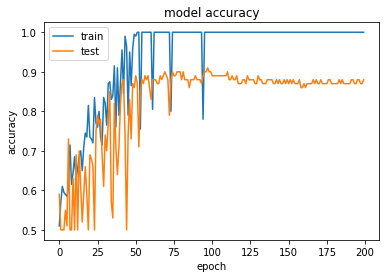

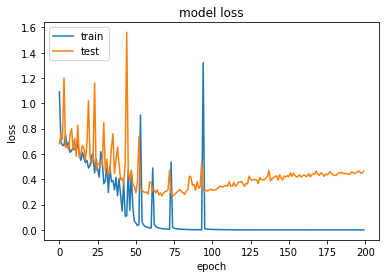

In [19]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()